In [1]:
import numpy as np
import netCDF4 as nc
import os
import scipy as sc, scipy.io
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
from salishsea_tools.nc_tools import scDataset
import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
%matplotlib inline

from IPython.display import Image

/home/imachuca/anaconda3/envs/gsw/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


http://www.people.fas.harvard.edu/~djmorin/waves/dispersion.pdf

Brink 1982 https://journals.ametsoc.org/doi/pdf/10.1175/1520-0485%281982%29012%3C0897%3AACOLCT%3E2.0.CO%3B2

Brink 1991

Brink 1980

Wang and Mooers 1976 https://journals.ametsoc.org/doi/pdf/10.1175/1520-0485%281976%29006%3C0853%3ACTWIAC%3E2.0.CO%3B2

desc of using program https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015JC011277

CTW review https://coaps.fsu.edu/~ddmitry/MyPapers/Dukhovskoy_nicaragua_shelf.pdf

# Finding wavenumbers

In [2]:
dispersion_data_A = np.loadtxt('/ocean/imachuca/CTW_Brink/dispc_33e06.dat')
dispersion_data_B = np.loadtxt('/ocean/imachuca/CTW_Brink/dispc_17e06.dat')
dispersion_data_C = np.loadtxt('/ocean/imachuca/CTW_Brink/dispc_66e07.dat')

wavenumber_A = dispersion_data_A[:, 0] #rad/cm
frequency_A = dispersion_data_A[:, 1] #rad/sec
frequency_2A = dispersion_data_A[:, 2] #rad/sec

wavenumber_B = dispersion_data_B[:, 0] #rad/cm
frequency_B = dispersion_data_B[:, 1] #rad/sec
frequency_2B = dispersion_data_B[:, 2] #rad/sec

wavenumber_C = dispersion_data_C[:, 0] #rad/cm
frequency_C = dispersion_data_C[:, 1] #rad/sec
frequency_2C = dispersion_data_C[:, 2] #rad/sec

In [3]:
# test 1
ind_1 = 31

# test 2
ind_2 = 90

# test 3
ind_3 = 20

# test 4
ind_4 = 10

(9.22e-08, 1.3148058e-06)

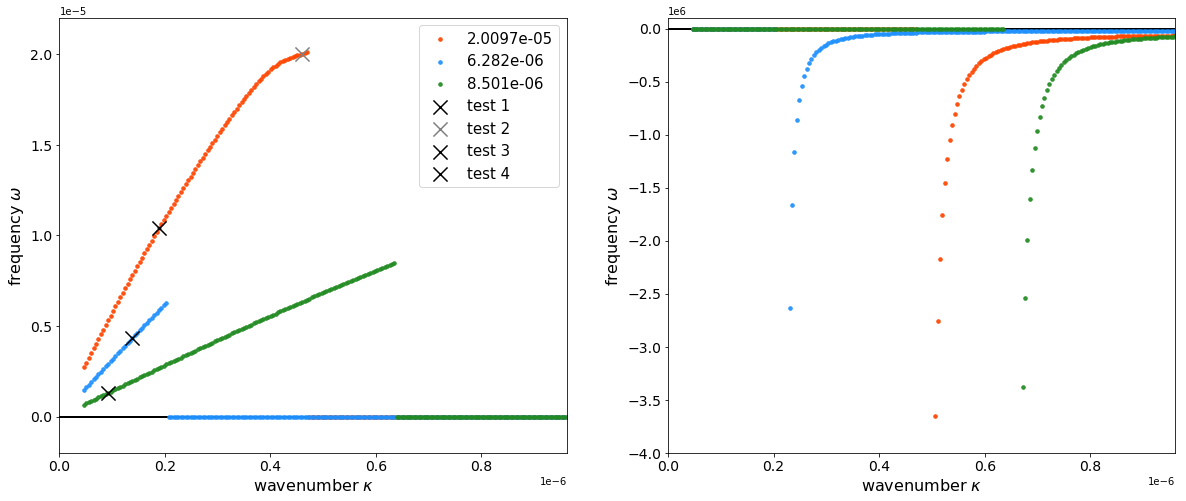

In [5]:
frequency_list = [frequency_A, frequency_B, frequency_C]
frequency_2_list = [frequency_2A, frequency_2B, frequency_2C]
wavenumber_list = [wavenumber_A, wavenumber_B, wavenumber_C]
c_list = ['orangered', 'dodgerblue', 'forestgreen']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

for frequency, frequency_2, wavenumber, c in zip(frequency_list, frequency_2_list, wavenumber_list, c_list):

    for ax, freq in zip([ax1, ax2], [frequency, frequency_2]):
        
        if ax == ax1:
            ax.set_ylim(-0.2e-5, 2.2e-5)
            lab = np.round(np.nanmax(freq),9)
        if ax == ax2:
            ax.set_ylim(-0.4e7, 0.1e6)
        
        ax.axhline(0,lw=2,c='k',zorder=1)
        ax.scatter(wavenumber, freq, marker='.', s=50, c=c, zorder=2, label=str(lab), alpha=0.9)
        ax.set_xlabel('wavenumber $\kappa$', fontsize=16)
        ax.set_ylabel('frequency $\omega$', fontsize=16)
        ax.xaxis.set_tick_params(labelsize=14)
        ax.yaxis.set_tick_params(labelsize=14)
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.set_xlim(0, wavenumber.max())

s=200
ax1.scatter(wavenumber_A[ind_1], frequency_A[ind_1], marker='x', s=s, c='k', zorder=2, label='test 1')
ax1.scatter(wavenumber_A[ind_2], frequency_A[ind_2], marker='x', s=s, c='gray', zorder=2, label='test 2')
ax1.scatter(wavenumber_B[ind_3], frequency_B[ind_3], marker='x', s=s, c='k', zorder=2, label='test 3')
ax1.scatter(wavenumber_C[ind_4], frequency_C[ind_4], marker='x', s=s, c='k', zorder=2, label='test 4')
ax1.legend(fontsize=15)
    
# kelvin dispersion    
#c = np.sqrt((9.81*100)*(80*100))
#w = c*wavenumber
#ax1.plot(wavenumber, w)
wavenumber_C[ind_4], frequency_C[ind_4]

In [61]:
N_shelf = [0.00452424, 0.00121879, 0.00056482, 0.00049661, 0.00030011,
           0.00043938, 0.00042318, 0.0003453 , 0.00034772, 0.00026242]
N = np.mean(N_shelf)
print('N_shelf', N)

H = 80
f = 0.0001368
L = 150*1000 # Brink program "domain width"

Bu = ((N*H)/(f*L))**2
print('Burger', Bu, 'barotropic') # barotropic


eke1 = 1.3544e+13
epe1 = 7.1374e+12
R = eke1/epe1
print('test 1 - ratio', R, 'shelf') # shelf wave

eke2 = 1.0532e+13
epe2 = 5.2046e+12
R = eke2/epe2
print('test 2 - ratio', R, 'shelf') #shelf wave

eke3 = 3.0130e+13     
epe3 = 1.5173e+13
R = eke3/epe3
print('test 3 - ratio', R, 'shelf')

eke4 = 1.0720e+14
epe4 = 4.8125e+13
R = eke4/epe4
print('test 4 - ratio', R, 'shelf')

N_shelf 0.0008922569999999998
Burger 1.2100552178242872e-05 barotropic
test 1 - ratio 1.8976097738672346 shelf
test 2 - ratio 2.0235945125465933 shelf
test 3 - ratio 1.9857641863837079 shelf
test 4 - ratio 2.2275324675324675 shelf


# Test 1

```matlab

Free surface
Closed BC at x = 0
Open BC at x = xmax
f = 1.3680e-04rad sec^-1
nn, mm = 164  80
 
 Max consistency ratio = 32.9921 at x = 118.8571 km
         This should be kept less than one, and definitely less than 10
 
 
Wavenumber = 1.888e-07rad cm^-1
 
wr, rrr = 1.0398e-05   3.4107e-30
wr, rrr = 1.0918e-05   2.1527e-25
wr, rrr = 9.8786e-06   2.6439e-25
wr, rrr = 1.0658e-05   1.2576e-25
wr, rrr = 1.0139e-05   1.9191e-25
wr, rrr = 1.0528e-05   5.2632e-26
wr, rrr = 1.0269e-05   7.5470e-26
wr, rrr = 1.0463e-05   1.6890e-26
wr, rrr = 1.0334e-05   2.0215e-26
wr, rrr = 1.0431e-05   4.7798e-27
wr, rrr = 1.0366e-05   4.8596e-27
wr, rrr = 1.0415e-05   1.3099e-27
wr, rrr = 1.0382e-05   1.1280e-27
wr, rrr = 1.0390e-05   2.4828e-28
 
Converged!
 
wr, rrr = 1.0398e-05   3.4107e-30
Perturbation frictional decay time (sec) = 6.4125e+05
 
EKE = 1.3544e+13     EPE = 7.1374e+12
Surface EPE = 2.0375e+10
```

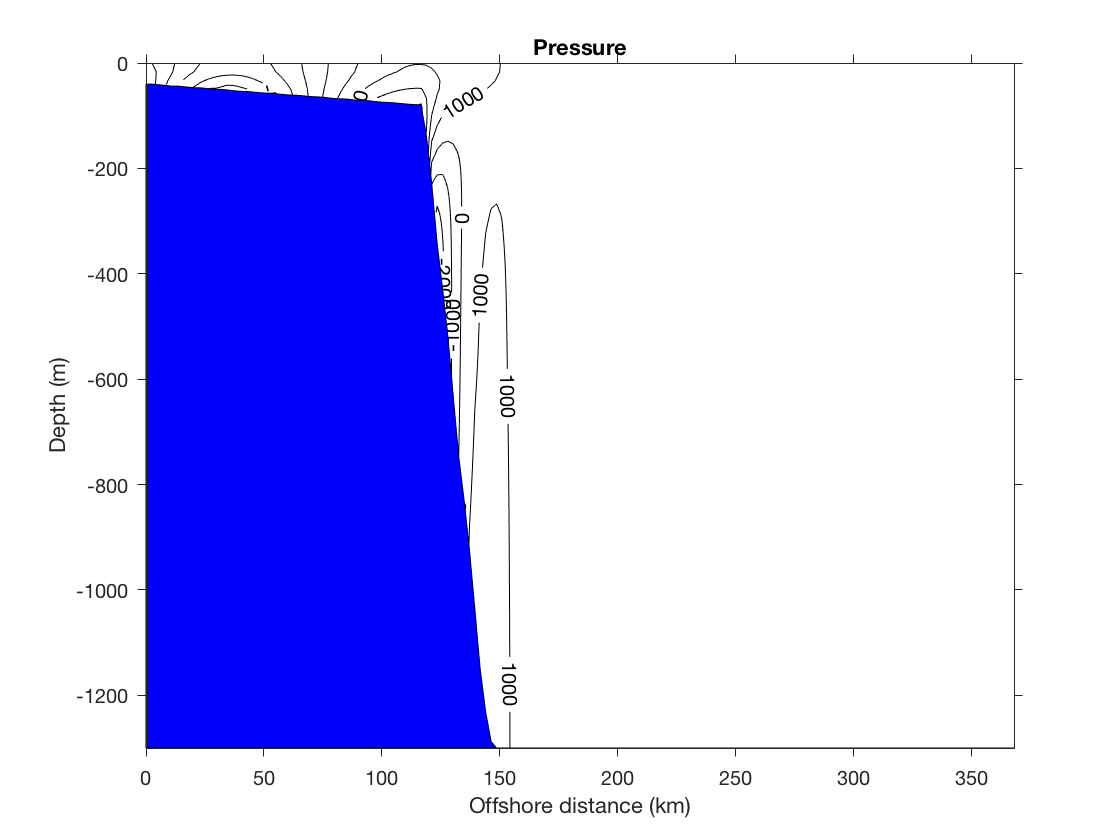

In [18]:
Image("/ocean/imachuca/CTW_Brink/test_1/fig1.png", width=600)

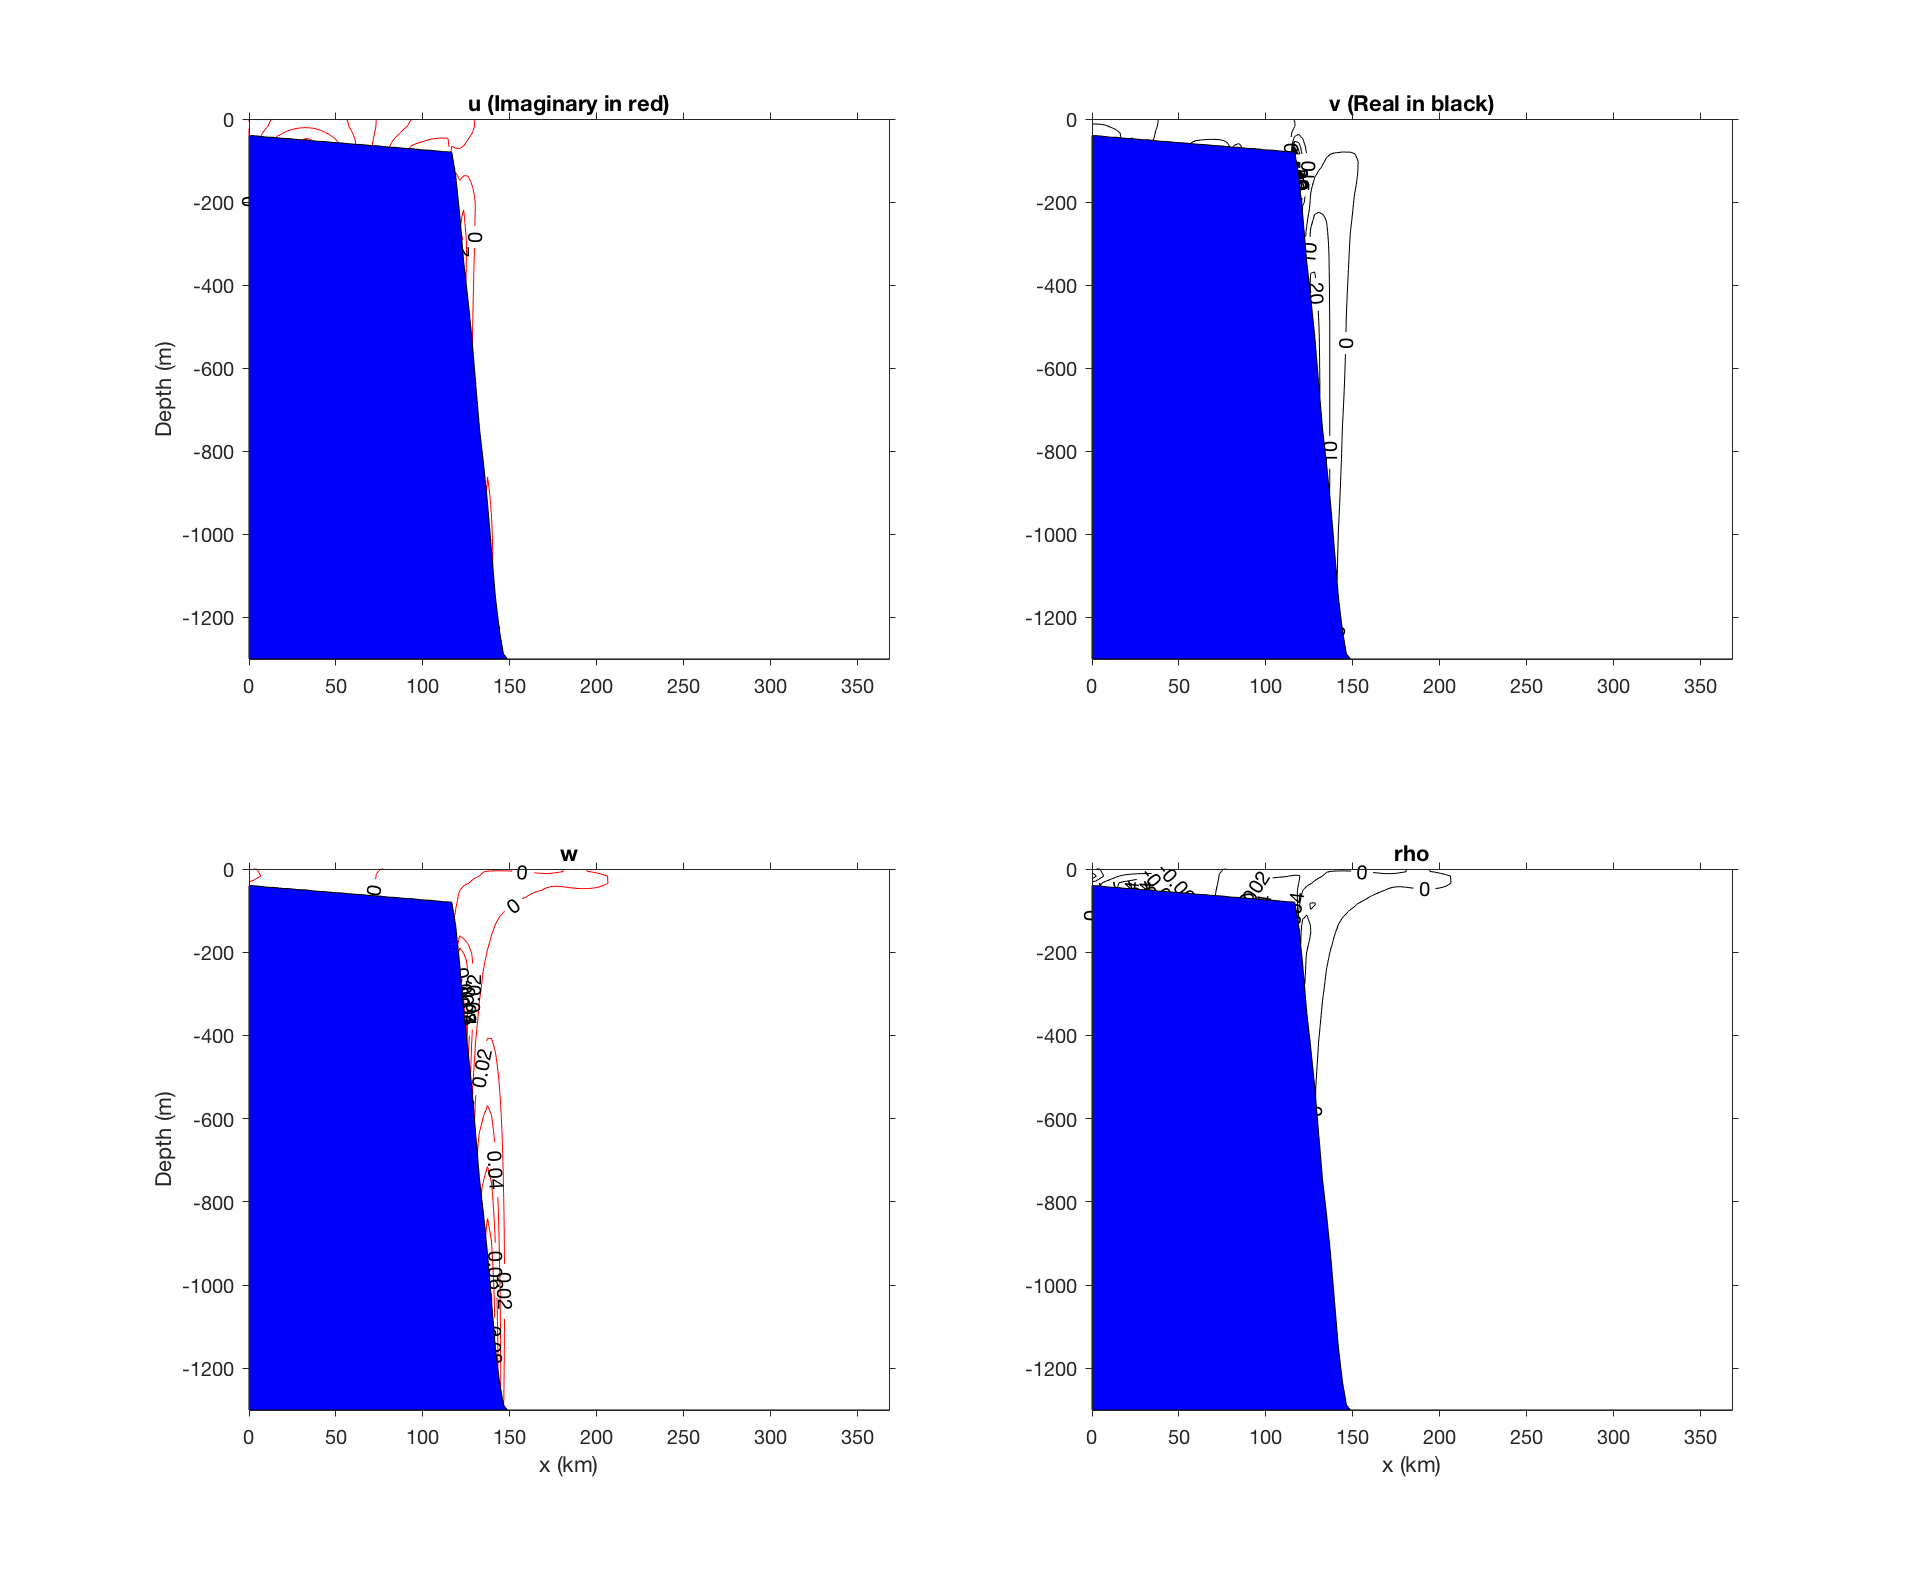

In [19]:
Image("/ocean/imachuca/CTW_Brink/test_1/fig3.png", width=600)

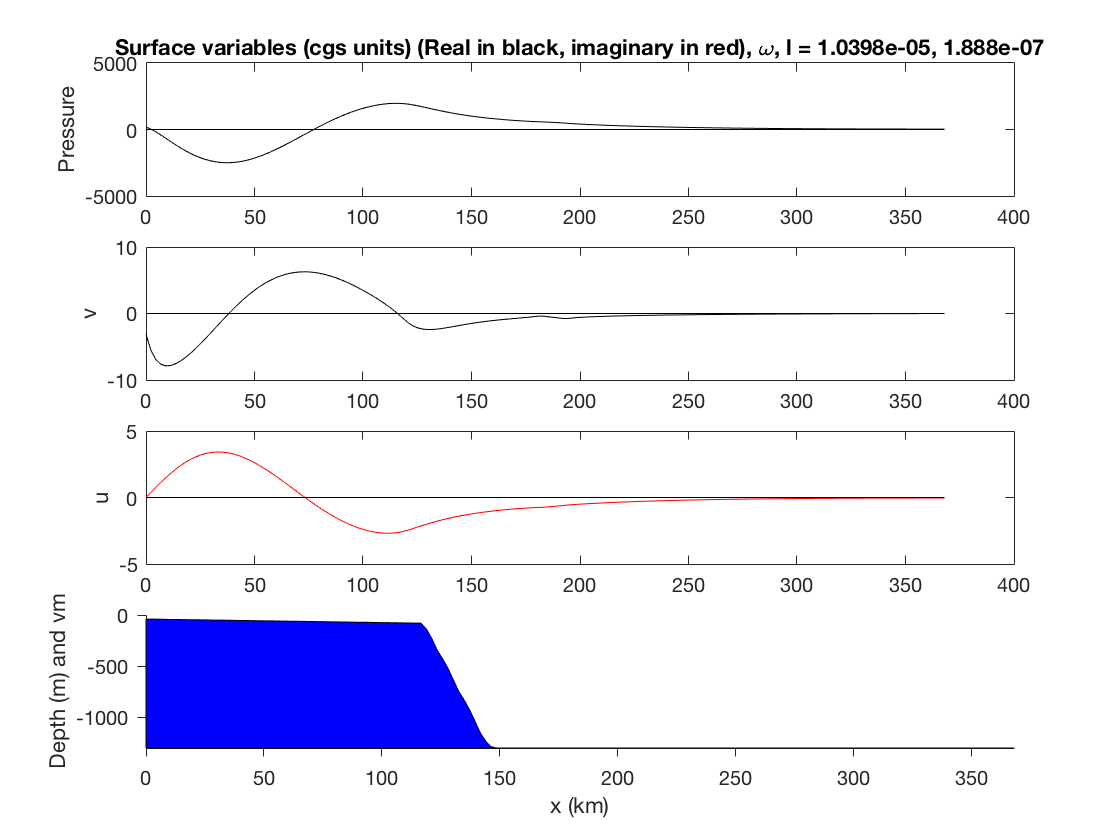

In [20]:
Image("/ocean/imachuca/CTW_Brink/test_1/fig4.png", width=600)

# Test 2

```matlab
Free surface
Closed BC at x = 0
Open BC at x = xmax
f = 1.3680e-04rad sec^-1
nn, mm = 164  80
 
 Max consistency ratio = 32.9921 at x = 118.8571 km
         This should be kept less than one, and definitely less than 10
 
 
Wavenumber = 4.602e-07rad cm^-1
 
wr, rrr = 2.0012e-05   2.4529e-28
wr, rrr = 2.1013e-05   2.8784e-24
wr, rrr = 1.9012e-05   2.3698e-24
wr, rrr = 1.9512e-05   2.4941e-24
wr, rrr = 2.0513e-05   2.7414e-24
wr, rrr = 1.9512e-05   2.4941e-24
wr, rrr = 1.9762e-05   2.5503e-24
wr, rrr = 2.0262e-05   2.6591e-24
wr, rrr = 1.9762e-05   2.5503e-24
wr, rrr = 1.9887e-05   2.5448e-24
wr, rrr = 2.0137e-05   2.5703e-24
wr, rrr = 1.9950e-05   2.4043e-24
wr, rrr = 2.0075e-05   2.3668e-24
wr, rrr = 2.0044e-05   1.8395e-24
wr, rrr = 1.9981e-05   1.9206e-24
wr, rrr = 2.0028e-05   9.8052e-25
 
Converged!
 
wr, rrr = 2.0012e-05   2.4529e-28
Perturbation frictional decay time (sec) = 2.0633e+05
 
EKE = 1.0532e+13     EPE = 5.2046e+12
Surface EPE = 4.1004e+10
```

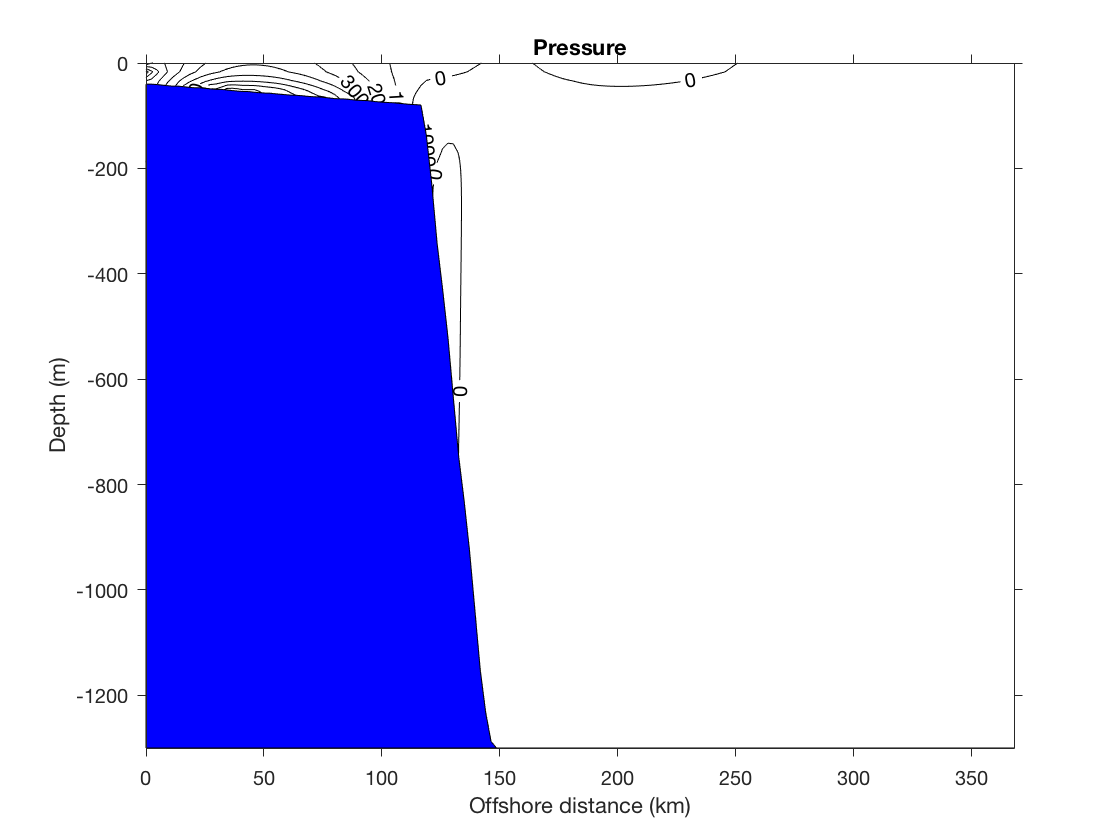

In [21]:
Image("/ocean/imachuca/CTW_Brink/test_2/fig1.png", width=600)

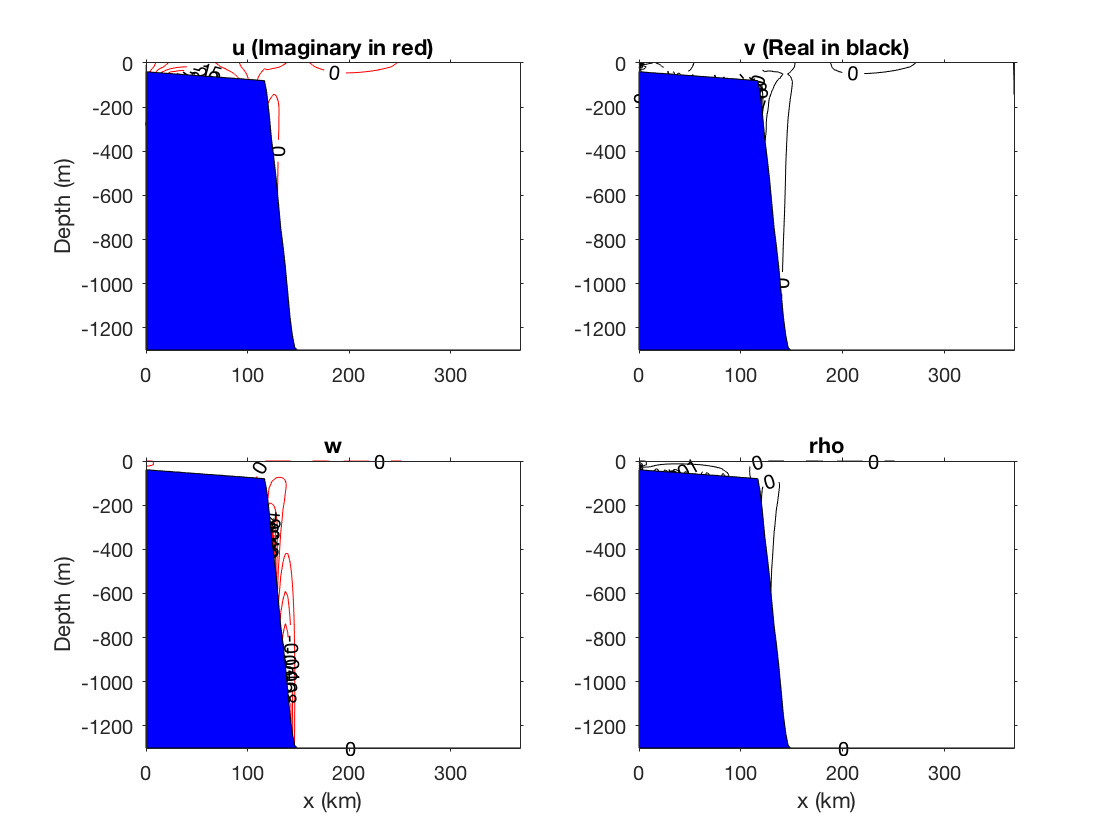

In [22]:
Image("/ocean/imachuca/CTW_Brink/test_2/fig3.png", width=600)

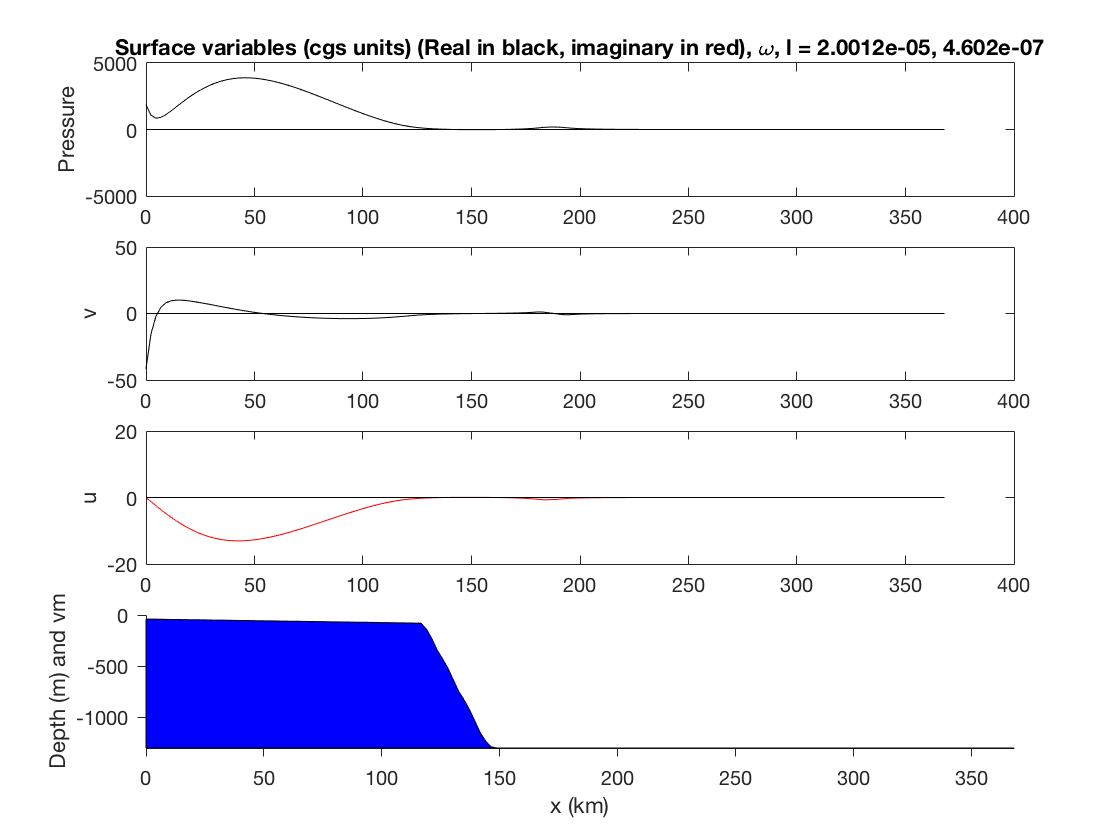

In [23]:
Image("/ocean/imachuca/CTW_Brink/test_2/fig6.png", width=600)

# Test 3

```matlab
Free surface
Closed BC at x = 0
Open BC at x = xmax
f = 1.3680e-04rad sec^-1
nn, mm = 164  80
 
 Max consistency ratio = 32.9921 at x = 118.8571 km
         This should be kept less than one, and definitely less than 10
 
 
Wavenumber = 1.382e-07rad cm^-1
 
wr, rrr = 4.3329e-06   4.4229e-31
wr, rrr = 4.5495e-06   4.4334e-26
wr, rrr = 4.1163e-06   3.6555e-26
wr, rrr = 4.2246e-06   3.9117e-26
wr, rrr = 4.4412e-06   4.1551e-26
wr, rrr = 4.2246e-06   3.9117e-26
wr, rrr = 4.2787e-06   4.1008e-26
wr, rrr = 4.3871e-06   3.9356e-26
wr, rrr = 4.2787e-06   4.1008e-26
wr, rrr = 4.3600e-06   3.6487e-26
wr, rrr = 4.3058e-06   4.2815e-26
wr, rrr = 4.3464e-06   3.1341e-26
wr, rrr = 4.3194e-06   4.3839e-26
wr, rrr = 4.3397e-06   2.2427e-26
wr, rrr = 4.3261e-06   3.8514e-26
wr, rrr = 4.3363e-06   1.1706e-26
 
Converged!
 
wr, rrr = 4.3329e-06   4.4229e-31
Perturbation frictional decay time (sec) = 7.8418e+05
 
EKE = 3.0130e+13     EPE = 1.5173e+13
Surface EPE = 5.3781e+09
```

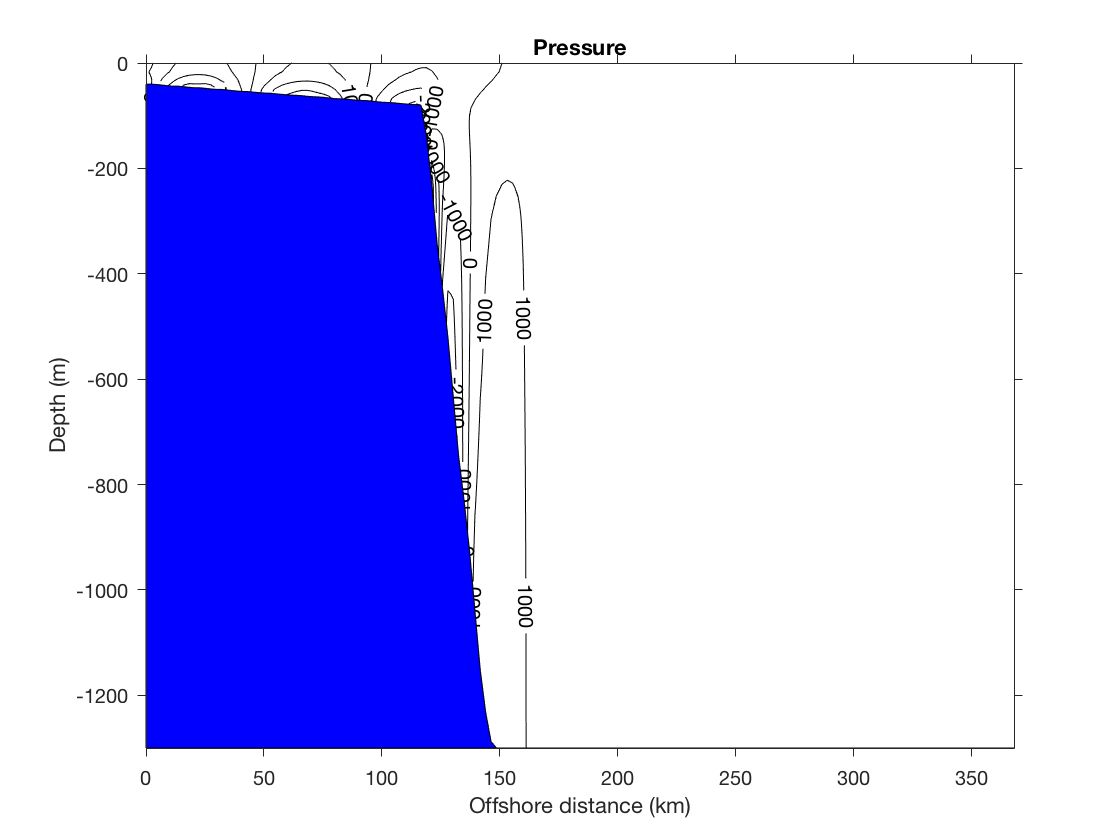

In [57]:
Image("/ocean/imachuca/CTW_Brink/test_3/fig1.png", width=600)

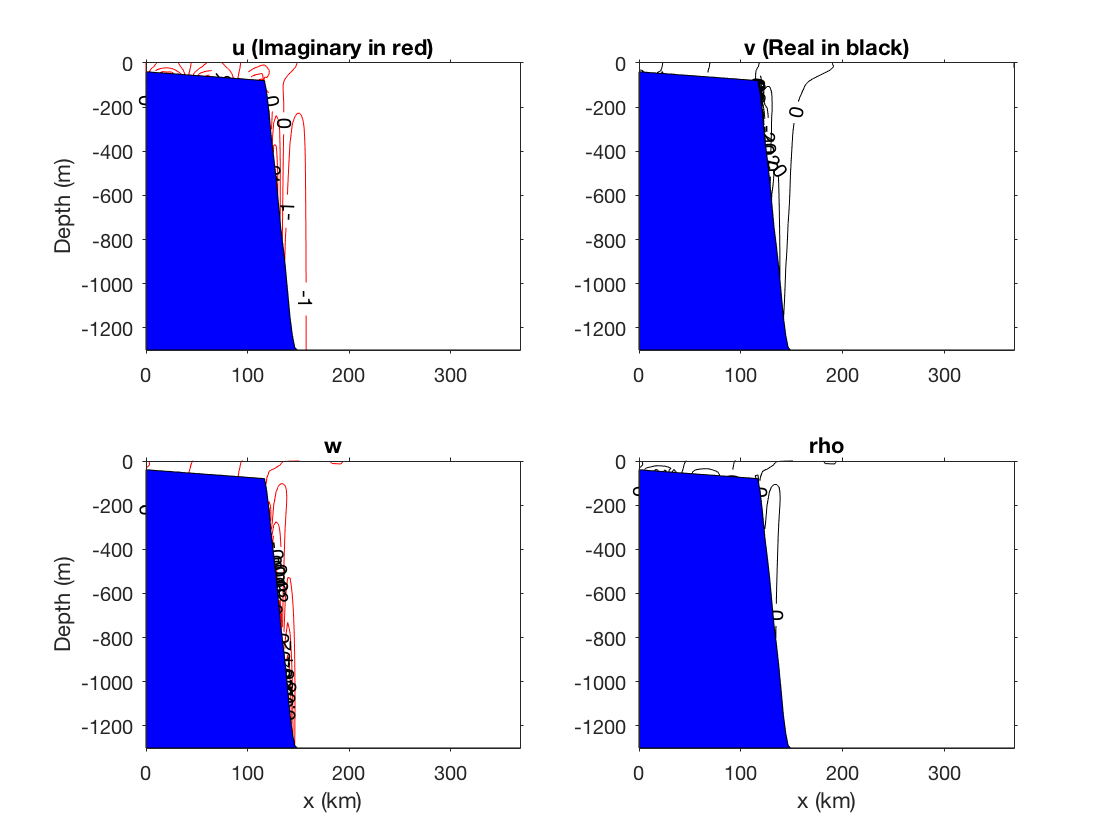

In [58]:
Image("/ocean/imachuca/CTW_Brink/test_3/fig3.png", width=600)

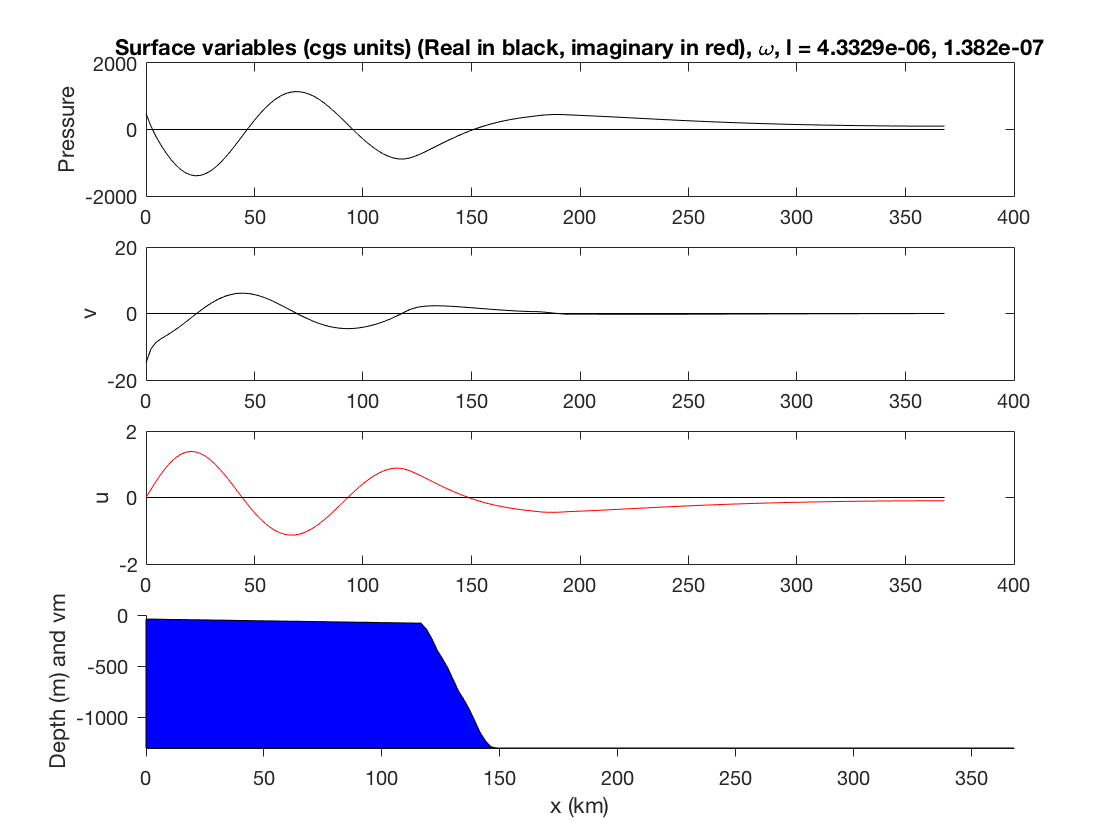

In [59]:
Image("/ocean/imachuca/CTW_Brink/test_3/fig6.png", width=600)

# Test 4

```matlab
Free surface
Closed BC at x = 0
Open BC at x = xmax
f = 1.3680e-04rad sec^-1
nn, mm = 164  80
 
 Max consistency ratio = 32.9921 at x = 118.8571 km
         This should be kept less than one, and definitely less than 10
 
 
Wavenumber = 9.22e-08rad cm^-1
 
wr, rrr = 1.3148e-06   2.0238e-29
wr, rrr = 1.3805e-06   3.5519e-27
wr, rrr = 1.2491e-06   2.4412e-27
wr, rrr = 1.2819e-06   2.6574e-27
wr, rrr = 1.3477e-06   2.9026e-27
wr, rrr = 1.2819e-06   2.6574e-27
wr, rrr = 1.2984e-06   2.8291e-27
wr, rrr = 1.3312e-06   2.6489e-27
wr, rrr = 1.2984e-06   2.8291e-27
wr, rrr = 1.3230e-06   2.3530e-27
wr, rrr = 1.3066e-06   2.9773e-27
wr, rrr = 1.3189e-06   1.8731e-27
wr, rrr = 1.3107e-06   2.8999e-27
wr, rrr = 1.3169e-06   1.2008e-27
wr, rrr = 1.3128e-06   1.8989e-27
wr, rrr = 1.3158e-06   5.9373e-28
 
Converged!
 
wr, rrr = 1.3148e-06   2.0238e-29
Perturbation frictional decay time (sec) = 2.1797e+05
 
EKE = 1.0720e+14     EPE = 4.8125e+13
Surface EPE = 4.3680e+09
```

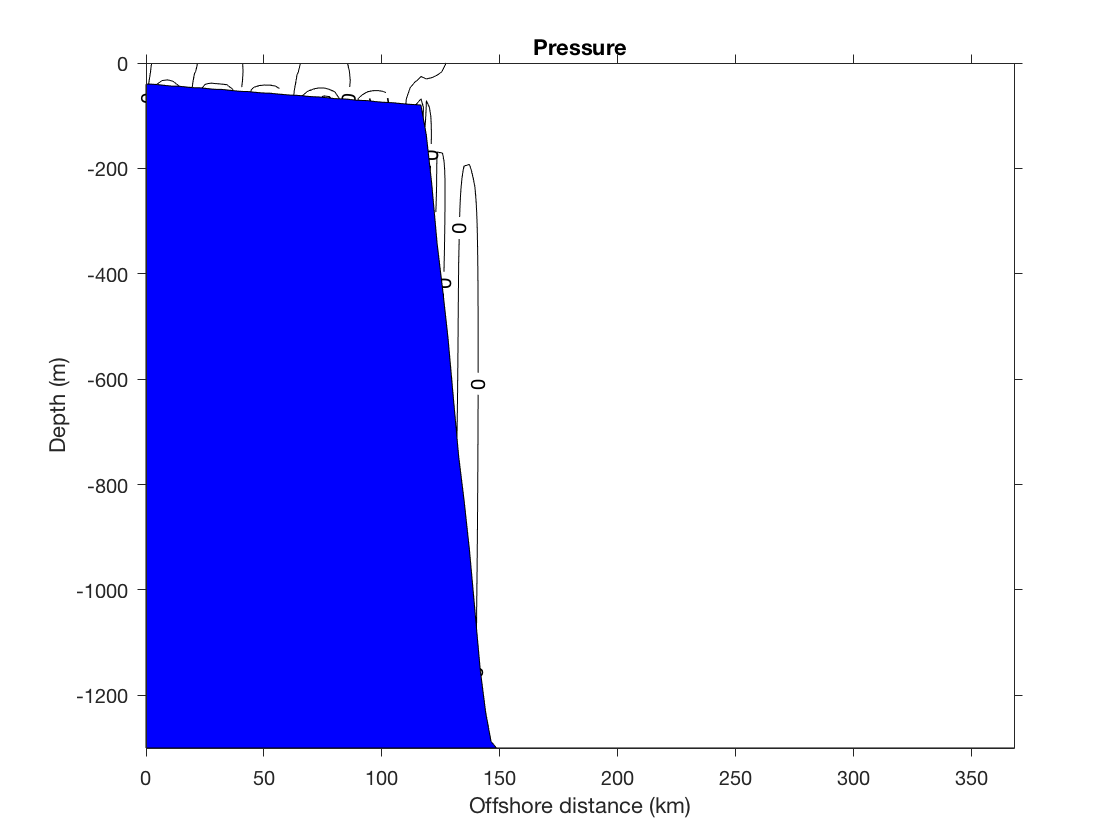

In [62]:
Image("/ocean/imachuca/CTW_Brink/test_4/fig1.png", width=600)

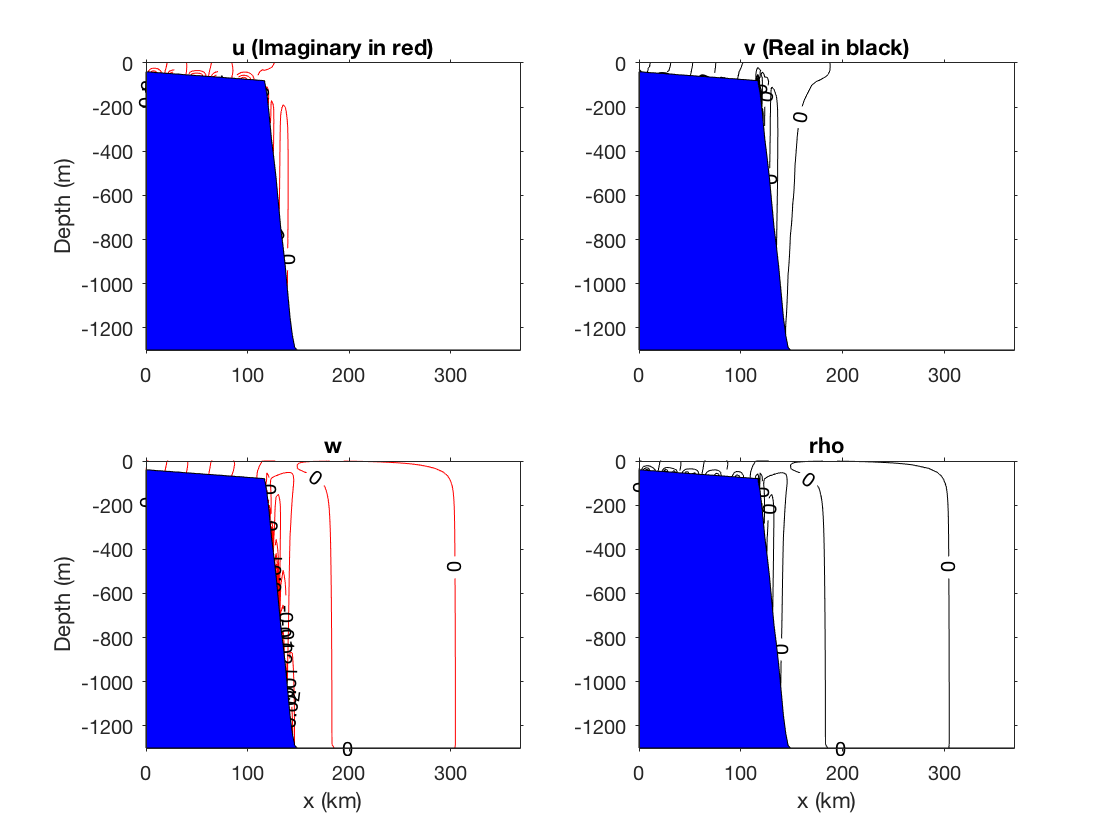

In [63]:
Image("/ocean/imachuca/CTW_Brink/test_4/fig3.png", width=600)

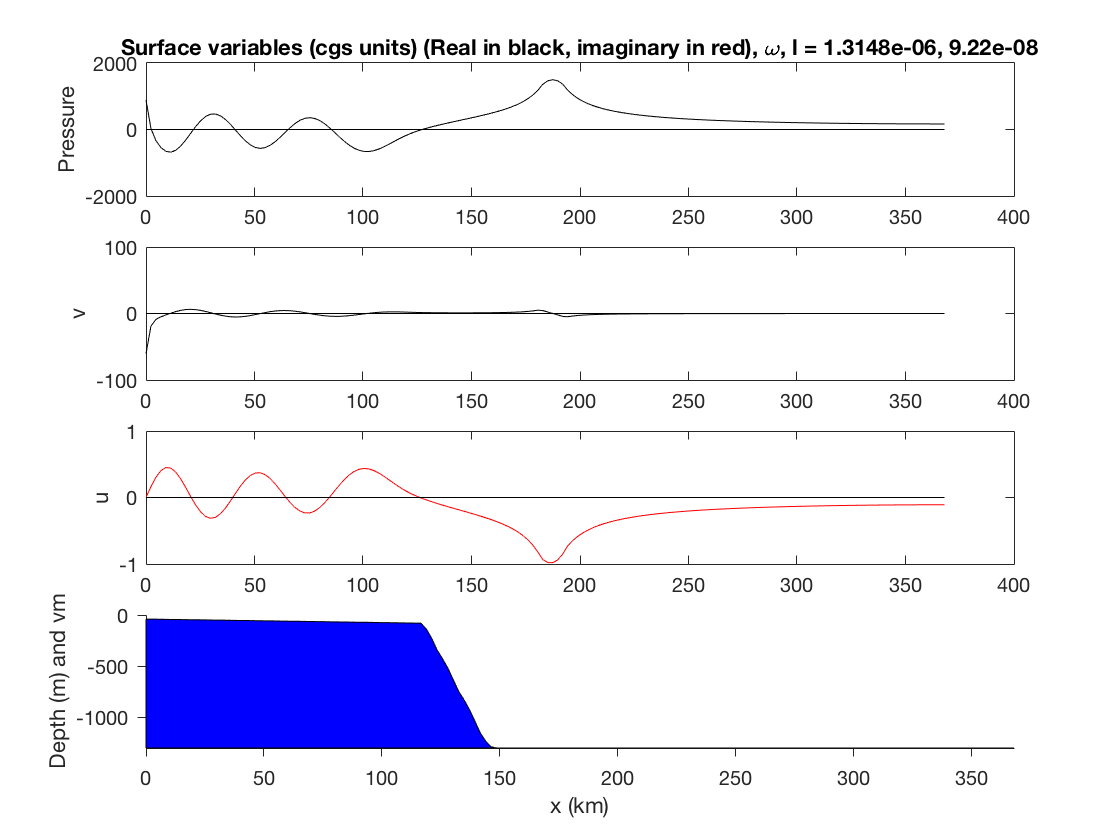

In [64]:
Image("/ocean/imachuca/CTW_Brink/test_4/fig6.png", width=600)